# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for black-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [7]:
# number of callbacks for black-sounding names
tot_b_called=sum(data[data.race=='b'].call)
tot_b_called

157.0

In [5]:
total_b=data[data.race=='b'].race.size
total_b

2435

In [8]:
## % of black that were called
per_b=tot_b_called/total_b*100
per_b

6.4476386036960989

In [9]:
data.race.size

4870

In [10]:
# number of callbacks for white-sounding names
tot_w_called=sum(data[data.race=='w'].call)
tot_w_called

235.0

In [11]:
total_w=data[data.race=='w'].race.size
total_w

2435

In [12]:
## % white called 
per_w=tot_w_called/total_w * 100
per_w

9.6509240246406574

In [13]:
diff=per_w-per_b
diff

3.2032854209445585

>Q1. What test is appropriate for this problem? Does CLT apply?

This is a binary response type of problem (1,0) which makes it a Bernoulli distribution or binomial distribution. However, testing the difference between the "percentage called back" for each race will follow a normal distribution in which CLT can be applied. Two sample t-test is appropriate to use in comparing these two percentages.

>Q2. What are the null and alternate hypotheses?

Ho: There is no difference between black and white resumes/ There is no significant difference between "percentage called back" for black and white resumes.
H1: There is difference between black and white resumes/ There is significant difference between "percentage called back" for black and white resumes.
Sample size>30 so z-statistic is appropriate

In [14]:

## percentage callback Black variance
P1=per_b/100
n1=total_b
var_b=(P1*(1-P1)/n1)
var_b

2.4771737856498466e-05

In [15]:

## percentage callback White variance
P2=per_w/100
n2=total_w
var_w=(P2*(1-P2)/n2)
var_w

3.5809119833046381e-05

In [16]:

## Sampling Distribution P1-P2 variance
var_b_w= var_b + var_w
var_b_w

6.0580857689544847e-05

In [17]:
std_b_w=np.sqrt(var_b_w)
std_b_w

0.0077833705866767544

In [18]:
abs(P1-P2)

0.032032854209445585

# Q3. Compute margin of error, confidence interval, and p-value.

In [19]:

## Using 95% Confidence level that (P1-P2) is within d of 0.032
#margin of error
moe=1.96*std_b_w
moe

0.015255406349886438

In [20]:
min_P1_P2=abs(P1-P2)-moe
min_P1_P2

0.016777447859559147

In [21]:
max_P1_P2=abs(P1-P2)+moe
max_P1_P2

0.047288260559332024

In [22]:

## confidence interval
ci = abs(P1-P2) + np.array([-1, 1]) * moe
ci

array([ 0.01677745,  0.04728826])

In [23]:

## Standard Error Calculation
SE=std_b_w
SE

0.0077833705866767544

In [24]:

## degrees of freedom
B1=var_b/n1
W1=var_w/n2

DF=((B1+W1)**2)/(((B1**2)/n1)+((W1**2)/n2))
DF

4713.5381934322604

In [25]:

t_val=((P1-P2)-0)/SE
t_val

-4.1155504357300003

In [26]:
p_value = stats.t.sf(np.abs(t_val), DF)*2  # two-sided pvalue = Prob(abs(t)>tt)
p_value

3.9285451158654165e-05

In [27]:

bb=data[data.race=='b'].call
ww=data[data.race=='w'].call

In [28]:

stats.ttest_ind(bb,ww,equal_var=False)

Ttest_indResult(statistic=-4.1147052908617514, pvalue=3.9429415136459352e-05)

In [29]:

std_b=np.sqrt(var_b)
std_b

0.0049771214428119461

In [30]:
std_w=np.sqrt(var_w)
std_w

0.0059840721781280661

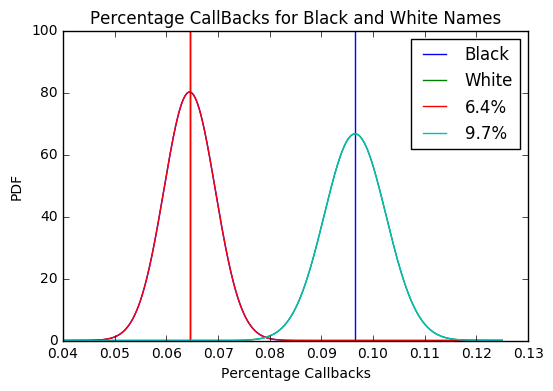

In [32]:

##Normal Distribution graph for Black and White % Call backs
import pylab
x = np.linspace(0.04,0.125,4870)
y1 = stats.norm.pdf(x, loc=P1, scale=std_b)    
pylab.plot(x,y1)

y2 = stats.norm.pdf(x, loc=P2, scale=std_w)    
pylab.plot(x,y2)
pylab.xlabel('Percentage Callbacks')
pylab.ylabel('PDF')
pylab.vlines(P1,0, 100, color='red')
pylab.vlines(P2,0,100, color='blue')
pylab.legend(['Black', 'White', '6.4%', '9.7%'])
pylab.title('Percentage CallBacks for Black and White Names')
pylab.show()

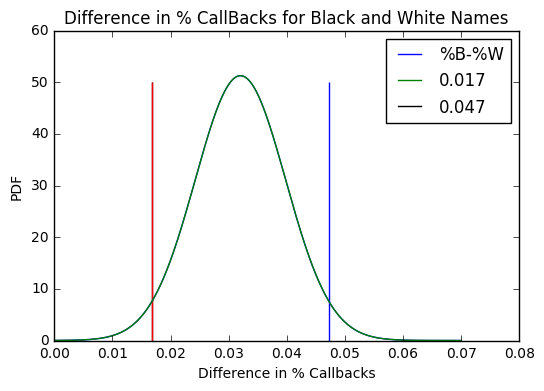

In [34]:
## Normal Distribution of difference in percentage of Black and White Callbacks
x = np.linspace(0,0.07,4870)
y1 = stats.norm.pdf(x, loc=abs(P1-P2), scale=std_b_w)    
pylab.plot(x,y1)

pylab.xlabel('Difference in % Callbacks')
pylab.ylabel('PDF')
pylab.vlines(min_P1_P2,0, 50, color='red')
pylab.vlines(max_P1_P2,0,50, color='blue')
pylab.legend(['%B-%W', '0.017', '0.047'])
pylab.title('Difference in % CallBacks for Black and White Names')
pylab.show()

# Calculated p_value < 0.05¶

so "Ho will be rejected and H1 will be accepted. Yes there is significance difference between black and white name sounding resumes looking at percentage callbacks. 

# Q4. Write a story describing the statistical significance in the context or the original problem.

Using 95% confidence level as threshold in all calculations, we can say that there is 95% confidence that confidence interval of "difference in % callbacks in black and white sounding resume"
is from 0.017 to 0.047.

# Q5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

The analysis I did does not mean that race/name is the most important factor in callback success. It only means that race/name is a factor that affect callback success. Correlation between different features and callback success must be analyzed and ranked to test which feature is most important in callback success.